<a href="https://colab.research.google.com/github/AdityaKalkeri/Evaluation_Projects/blob/main/Project14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.set_palette("viridis")

In [3]:
from google.colab import files
upload = files.upload()

Saving Data_Train.xlsx to Data_Train.xlsx


In [4]:
import io
df = pd.read_excel(io.BytesIO(upload['Data_Train.xlsx']))
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [6]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [7]:
print(df.nunique())

TITLE              113
RESTAURANT_ID    11892
CUISINES          4155
TIME              2689
CITY               359
LOCALITY          1416
RATING              32
VOTES             1847
COST                86
dtype: int64


# Preprocessing

In [8]:
df['CUISINES'].head(30)

0                         Malwani, Goan, North Indian
1                      Asian, Modern Indian, Japanese
2          North Indian, Chinese, Biryani, Hyderabadi
3                                    Tibetan, Chinese
4                                            Desserts
5             North Indian, Chinese, Seafood, Biryani
6          Cafe, Chinese, Pizza, North Indian, Burger
7                                            Bar Food
8                          South Indian, North Indian
9                                        North Indian
10          North Indian, Chinese, Fast Food, Biryani
11                       Fast Food, Burger, Beverages
12                                   Arabian, Mughlai
13                                       South Indian
14                                      Maharashtrian
15                                  Parsi, Hyderabadi
16                            North Indian, Fast Food
17                  North Indian, Hyderabadi, Chinese
18                          

In [9]:
df.groupby("CUISINES")['CUISINES'].count().sort_values(ascending = False).head(50)

CUISINES
South Indian                           532
North Indian                           526
North Indian, Chinese                  501
Fast Food                              286
Chinese                                167
Bakery                                 148
Bakery, Desserts                       148
South Indian, North Indian, Chinese    139
Cafe                                   134
Kerala                                 131
Biryani                                129
Street Food                            121
Chinese, North Indian                  119
South Indian, North Indian             106
North Indian, Mughlai                  102
North Indian, Chinese, Biryani          91
Finger Food                             87
North Indian, South Indian, Chinese     87
Desserts                                87
Ice Cream, Desserts                     81
Arabian                                 80
Bakery, Fast Food                       79
North Indian, South Indian              74
No

Main Cuisines:

1. North Indian - includes Biryani and Mughlai cuisines
2. South Indian -  has Kerala and Andhra cuisines
3. Fast Food - Street Food,Bevarages, Cafe Food, Burgers
4. Oriental - Chinese, Thai, Momos
5. Bakery, Desserts - Ice Creams, Mithai, etc
6. Middle Eastern - Arabian
7. Continental - Pizza, Italian, 
8. Multiple cuisines - many cuisines served at the same restaurants:North Indian, South Indian, Chinese, Continental, etc

In [10]:
import re
def multiple(row):
  x = re.findall("Indian.*Indian|Indian.*Chinese|Chinese.*Indian|Indian.*Continental", row['CUISINES'])
  if len(x)>0:
    row['CUISINES'] = 'Multiple_Cuisine'
  return row

df = df.apply(multiple, axis = 1)

In [11]:
def north(row):
  x = re.findall("Biryani|North|Mughlai|Bengali|Gujarati|Rajasthani|Bihari|Oriya", row['CUISINES'])
  if len(x)>0:
    row['CUISINES'] = 'North Indian'
  return row

df=  df.apply(north, axis = 1)

In [12]:
def south(row):
  x = re.findall("Kerala|Andhra|Chettinad|South Indian|Maharashtrian", row['CUISINES'])
  if len(x)>0:
    row['CUISINES'] = 'South Indian'
  return row

df = df.apply(south, axis =1)

In [13]:
def chinese(row):
  x = re.findall("Chinese|Thai|Japanese|Asian|Korean|Momos|Burmese", row['CUISINES'])
  if len(x)>0:
    row['CUISINES'] = 'Oriental'
  return row

df= df.apply(chinese, axis = 1)

In [14]:
def fast_food(row):
  x = re.findall("Street|Fast|Finger|Cafe|Burger|American|Sandwich|Rolls|Mexican", row['CUISINES'])
  if len(x)>0:
    row['CUISINES'] = 'Fast Food'
  return row

df = df.apply(fast_food, axis =1)

In [15]:
def continental(row):
  x = re.findall("Italian|Continental|Pizza|European", row['CUISINES'])
  if len(x)>0:
    row['CUISINES']  = 'Continental'
  return row

df = df.apply(continental, axis = 1 )

In [16]:
def dessert(row):
  x = re.findall("Desserts|Bakery|Ice Cream|Mithai|Beverages|Juices", row['CUISINES'])
  if len(x)>0:
    row['CUISINES'] = 'Bakery Dessert'
  return row

df = df.apply(dessert, axis = 1)

In [17]:
def middleeast(row):
  x= re.findall("Arabian|Lebanese|Middle Eastern|Turkish", row['CUISINES'])
  if len(x)>0:
    row['CUISINES'] = 'Middle Eastern'
  return row

df = df.apply(middleeast, axis = 1)

In [18]:
cuisines = ['South Indian', 'North Indian', "Middle Eastern", "Bakery Dessert", "Continental", "Oriental", "Multiple_Cuisine", "Fast Food"]
def others(row):
  if row['CUISINES'] in cuisines:
    return row
  row['CUISINES'] = 'Other'
  return row

df = df.apply(others, axis =1)

In [19]:
cuisines = ['South Indian', 'North Indian', "Middle Eastern", "Bakery Dessert", "Continental", "Oriental", "Multiple_Cuisine", "Fast Food"]


In [20]:
df['CUISINES']

0            North Indian
1                Oriental
2        Multiple_Cuisine
3                Oriental
4          Bakery Dessert
               ...       
12685        North Indian
12686         Continental
12687            Oriental
12688    Multiple_Cuisine
12689    Multiple_Cuisine
Name: CUISINES, Length: 12690, dtype: object

In [21]:
df.groupby("CUISINES")['CUISINES'].count().sort_values(ascending = False).head(10)

CUISINES
Multiple_Cuisine    3914
Fast Food           2539
North Indian        2295
Oriental            1152
South Indian        1139
Bakery Dessert       963
Continental          376
Middle Eastern       157
Other                155
Name: CUISINES, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [23]:
df.groupby("TITLE")['TITLE'].count().sort_values(ascending =False).head(50)

TITLE
QUICK BITES                     4218
CASUAL DINING                   3652
None                            1003
CAFÉ                             607
DESSERT PARLOR                   382
CASUAL DINING,BAR                349
FINE DINING                      308
BAKERY                           302
BEVERAGE SHOP                    156
BAR,CASUAL DINING                128
LOUNGE                            98
BAKERY,QUICK BITES                92
BAR                               91
FOOD COURT                        78
CASUAL DINING,CAFÉ                56
KIOSK                             53
MESS                              53
BAKERY,DESSERT PARLOR             51
PUB                               50
DESSERT PARLOR,QUICK BITES        48
SWEET SHOP,QUICK BITES            48
DHABA                             45
SWEET SHOP                        44
CAFÉ,CASUAL DINING                35
QUICK BITES,SWEET SHOP            35
BEVERAGE SHOP,QUICK BITES         33
FINE DINING,BAR                 

In [24]:
def quickbites(row):
  x = re.findall("QUICK BITES|FOOD TRUCK|KIOSK|MESS|FOOD COURT|PAAN SHOP|MEAT SHOP", row['TITLE'])
  if len(x)>0:
    row['TITLE'] = 'QUICK BITES'
  return row
df = df.apply(quickbites, axis = 1)

In [25]:
def cafe(row):
  x = re.findall("CAFÉ|CAFÉ, CASUAL DINING| CAFÉ, QUICK BITES", row['TITLE'])
  if len(x)>0:
    row['TITLE'] = 'CAFÉ'
  return row

df = df.apply(cafe, axis = 1)

In [26]:
def dessert(row):
  x = re.findall("DESSERT PARLOR|BEVERAGE SHOP|SWEET SHOP|BAKERY|CONFECTIONERY", row['TITLE'])
  if len(x)>0:
    row['TITLE'] = 'DESSERT PARLOR'
  return row

df= df.apply(dessert, axis =1)

In [27]:
def bar(row):
  x = re.findall("BAR|BAR, CASUAL DINING|FINE DINING, BAR|PUB|MICROBREWERY", row['TITLE'])
  if len(x)>0:
    row['TITLE'] = 'BAR'

  return row

df = df.apply(bar, axis = 1)

In [28]:
def casual(row):
  x = re.findall("CASUAL DINING|FINE DINING|LOUNGE|DHABA|CLUB", row['TITLE'])
  if len(x)>0:
    row['TITLE'] = 'CASUAL DINING'
  
  return row

df = df.apply(casual, axis = 1)

In [29]:
map_dict = {"None" : "Other",
            'CASUAL DINING': 'CASUAL DINING',
            "BAR": "BAR",
            'CAFÉ': 'CAFÉ',
            'DESSERT PARLOR': 'DESSERT PARLOR',
            'QUICK BITES':'QUICK BITES'
            }
df['TITLE'] = df['TITLE'].map(map_dict)

In [30]:
df.groupby("TITLE")['TITLE'].count().sort_values(ascending =False).head(50)

TITLE
QUICK BITES       4830
CASUAL DINING     4183
DESSERT PARLOR    1019
Other             1003
BAR                840
CAFÉ               815
Name: TITLE, dtype: int64

In [31]:
df.groupby("TIME")['TIME'].count().sort_values(ascending = False).head(40)

TIME
11am – 11pm (Mon-Sun)                    1415
12noon – 12midnight (Mon-Sun)             469
12noon – 11pm (Mon-Sun)                   407
11am – 12midnight (Mon-Sun)               310
10am – 10pm (Mon-Sun)                     221
12noon – 1am (Mon-Sun)                    197
10am – 11pm (Mon-Sun)                     183
7am – 11pm (Mon-Sun)                      183
8am – 11pm (Mon-Sun)                      175
24 Hours (Mon-Sun)                        172
12noon – 11:30pm (Mon-Sun)                156
11am – 10pm (Mon-Sun)                     154
11am – 11:30pm (Mon-Sun)                  143
11:30am – 11:30pm (Mon-Sun)               138
9am – 11pm (Mon-Sun)                      120
11am – 1am (Mon-Sun)                      114
11:30am – 11pm (Mon-Sun)                  109
7am – 10:30pm (Mon-Sun)                   102
8am – 10pm (Mon-Sun)                      101
7am – 10pm (Mon-Sun)                      100
11am – 10:30pm (Mon-Sun)                   95
9am – 10pm (Mon-Sun)         

In [32]:
def eleven(row):
  x = re.findall("11.*11|12.*11|10.*10|10.*11|11.*10|12.*10|2.*11|3.*11", row['TIME'])
  if len(x)>0:
    row['TIME'] = "11am-11pm"
  return row
df = df.apply(eleven, axis =1)

In [33]:
def midnight(row):
  x = re.findall("12.*12|11.*12|10.*12|2.*12", row['TIME'])
  if len(x)>0:
    row['TIME'] = "11am-midnight"
  return row

df = df.apply(midnight, axis = 1)


In [34]:
def breakfast(row):
  x = re.findall("8am|7am|6am|9am|5am", row['TIME'])
  if len(x)>0:
    row['TIME'] = '7am-11pm'
  return row

df = df.apply(breakfast, axis = 1)

In [35]:
def evening(row):
  x = re.findall("5pm|6pm|4pm", row['TIME'])
  if len(x)>1:
    row["TIME"] = '5pm-11pm'
  return row

df = df.apply(evening, axis = 1)



In [36]:
def afterhours(row):
  x = re.findall(" 1am|2am|3am|4am|1:30am", row['TIME'])
  if len(x)>0:
    row["TIME"] = "5pm-2am"
  return row

df = df.apply(afterhours, axis = 1)


In [37]:
times=['11am-11pm', '7am-11pm', '5pm-11pm',  "5pm-2am"]
def others(row):
  if row['TIME'] not in times:
    row['TIME'] = "others"
  return row

df = df.apply(others, axis=1)

In [38]:
df.groupby("TIME")['TIME'].count().sort_values(ascending = False).head(10)

TIME
11am-11pm    6173
others       3066
7am-11pm     2199
5pm-2am      1221
5pm-11pm       31
Name: TIME, dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [40]:
df.groupby("CITY")['CITY'].count().sort_values(ascending = False).head(30)

CITY
Chennai          2174
Bangalore        2149
Hyderabad        1819
Mumbai           1722
New Delhi        1321
Kochi            1279
Gurgaon           379
Secunderabad      310
Noida             211
Navi Mumbai       165
Ghaziabad         102
Thane              97
Faridabad          79
Bandra West        69
Thane West         52
Andheri West       48
Bengaluru          42
Greater Noida      31
India              23
Kakkanad           15
Ernakulam          14
Dwarka             10
Kerala             10
Delhi NCR           9
Delhi               8
Edappally           7
Hyderabad.          7
Telangana           7
Gurugram            7
Bengalore           6
Name: CITY, dtype: int64

In [41]:
def nanfill(row):
  def isnan(string):
    return string != string
  if isnan(row["CITY"]):
    row['CITY'] = 'Other'
  return row

df = df.apply(nanfill, axis = 1)

In [42]:
def mumbai(row):
  x = re.findall("Mumbai|Andheri|Thane|Bandra|Maharashtra|Powai", row['CITY'])
  if len(x)>0:
    row['CITY'] = "Mumbai"
  return row

df = df.apply(mumbai, axis = 1)

In [43]:
def bangalore(row):
  x = re.findall("Banglore|Bengaluru|Bengalore|Bangalore", row['CITY'])
  if len(x)>0:
    row['CITY'] = 'Bangalore'
  return row

df = df.apply(bangalore, axis = 1)

In [44]:
def hyd(row):
  x = re.findall("Hyderabad|Secunderabad|Telangana", row["CITY"])
  if len(x)>0:
    row['CITY'] = 'Hyderabad'
  return row

df = df.apply(hyd, axis = 1)

In [45]:
def delhi(row):
  x = re.findall("Noida|Delhi|Gurugram|Gurgaon|Faridabad|Gaziabad|Ghaziabad", row['CITY'])
  if len(x)>0:
    row['CITY'] = 'Delhi'
  return row

df = df.apply(delhi, axis = 1)

In [46]:
def kochi(row):
  x = re.findall('Ernakulam|Kakkanad|Kerala', row['CITY'])
  if len(x)>0:
    row['CITY'] = 'Kochi'
  return row

df = df.apply(kochi, axis =1)

In [47]:
def chennai(row):
  x = re.findall("Chennai|Tamil Nadu", row['CITY'])
  if len(x)>0:
    row['CITY'] = 'Chennai'
  return row

df = df.apply(chennai, axis = 1)

In [48]:
city = ["Chennai", "Bangalore", "Mumbai", "Hyderabad", "Delhi", "Kochi"]
def other(row):
  if row['CITY'] not in city:
    row["CITY"] = "Other"
  return row

df = df.apply(other, axis = 1)

In [49]:
df.groupby("CITY")['CITY'].count().sort_values(ascending = False).head(30)

CITY
Bangalore    2220
Chennai      2204
Mumbai       2187
Delhi        2162
Hyderabad    2159
Kochi        1328
Other         430
Name: CITY, dtype: int64

In [50]:
df['LOCALITY'].head(10)

0           Dombivali East
1                Ramapuram
2               Saligramam
3              Bandra West
4              Lower Parel
5          Vile Parle West
6    Koramangala 6th Block
7                Sector 29
8        Bannerghatta Road
9             Dilsukhnagar
Name: LOCALITY, dtype: object

In [51]:
df.drop("LOCALITY", axis = 1, inplace = True)

In [52]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12690 non-null  object
 5   RATING         12688 non-null  object
 6   VOTES          11486 non-null  object
 7   COST           12690 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 793.2+ KB


In [53]:
def nan(row):
  if row['RATING'] == 'NEW' or row['RATING'] == '-':
    row['RATING'] = np.nan
  return row

df = df.apply(nan, axis = 1)

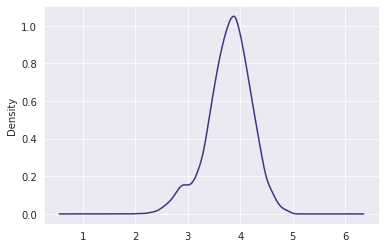

In [54]:
df['RATING'] = df['RATING'].astype(float)
df['RATING'].plot(kind = 'kde')

So most of the ratings are between 3.5 and 4.5, we will impute the values between these range to the dataset

In [55]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
RATING           1204
VOTES            1204
COST                0
dtype: int64

In [56]:
df['VOTES'].head(30)

0       49 votes
1       30 votes
2      221 votes
3       24 votes
4      165 votes
5      550 votes
6      509 votes
7     1612 votes
8      101 votes
9      219 votes
10     244 votes
11     274 votes
12      15 votes
13           NaN
14     160 votes
15    2499 votes
16     319 votes
17     121 votes
18     535 votes
19     350 votes
20     400 votes
21    1327 votes
22    1191 votes
23     533 votes
24     493 votes
25     372 votes
26     105 votes
27     178 votes
28     150 votes
29    2456 votes
Name: VOTES, dtype: object

In [57]:
def votes(row):
  def isnan(text):
    return text != text
  if isnan(row['VOTES']):
    return row
  row['VOTES'] = int(row['VOTES'].split()[0])
  return row
df = df.apply(votes, axis = 1)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


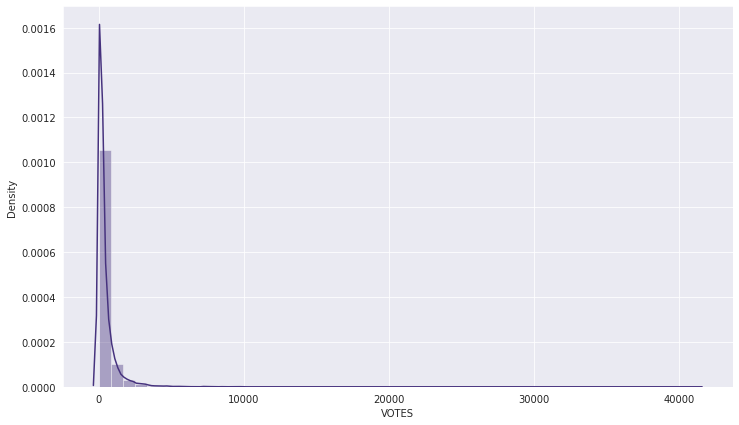

In [58]:
plt.figure().set_size_inches(12,7)
sns.distplot(df['VOTES'])

There are lot of outliers in the VOTES section, which may affect model performance.

In [59]:
#MEAN AND MEDIAN VALUES FOR RATING & VOTES
print("RATING mean = ",np.mean(df['RATING']))
print("VOTES mean = ",np.mean(df['VOTES']))

RATING mean =  3.785451854431486
VOTES mean =  415.66890127111265


In [60]:
#IMPUTING MEAN VALUES TO THE COLUMNS

In [61]:
df['VOTES'].fillna(415, inplace = True)
df['RATING'].fillna(3.78, inplace = True)

# Exploratory data analysis

## Numeric data

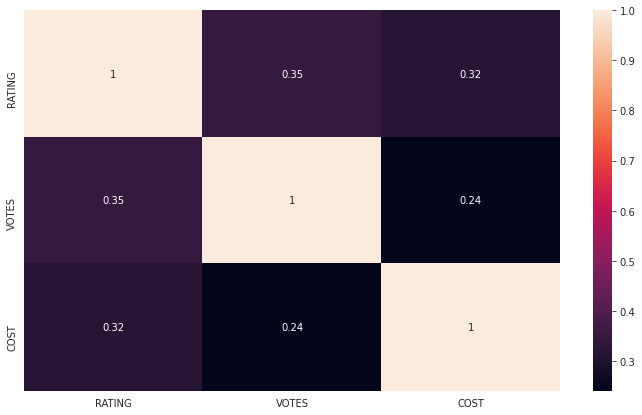

In [62]:
plt.figure().set_size_inches(12,7)
sns.heatmap(df[['RATING', 'VOTES', 'COST']].corr(), annot = True)

The numeric variables have low correlation amongst them

<Figure size 1080x1080 with 0 Axes>

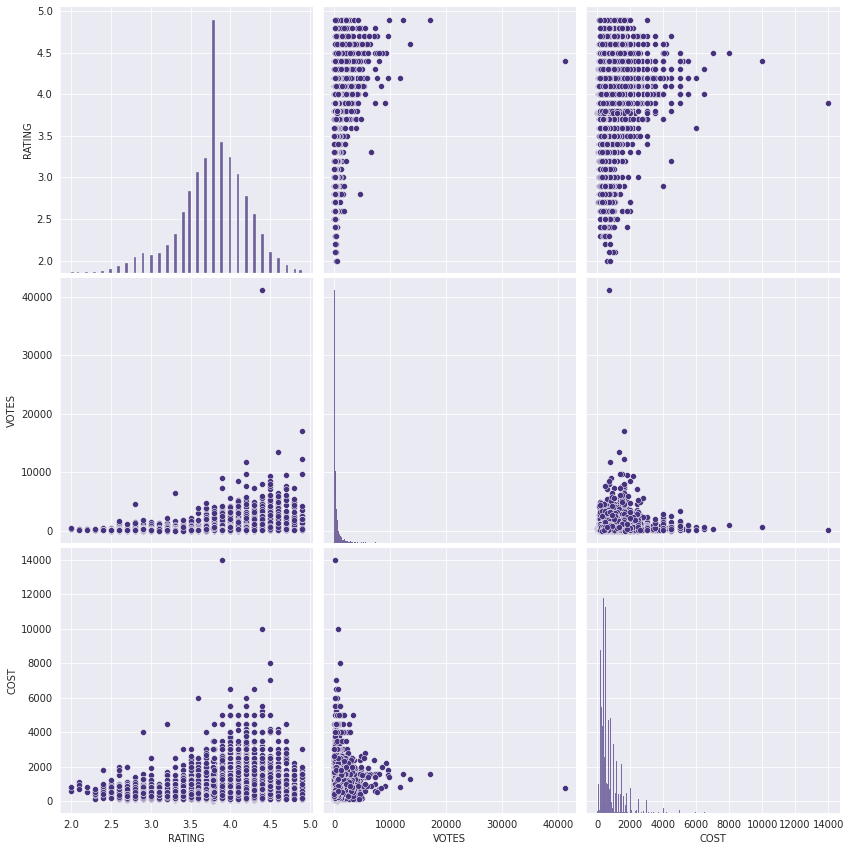

In [63]:
plt.figure().set_size_inches(15,15)
sns.pairplot(df[['RATING', 'VOTES', 'COST']], height = 4)

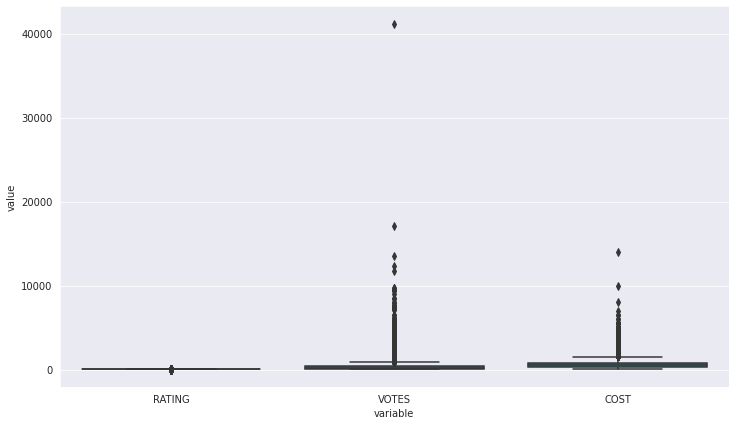

In [64]:
plt.figure().set_size_inches(12,7)
sns.boxplot(x="variable", y="value", data = pd.melt(df[['RATING', 'VOTES', 'COST']]))

Lot of outliers in all 3 features, we will first remove the outliers only in X_train, then test the model on X_test

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


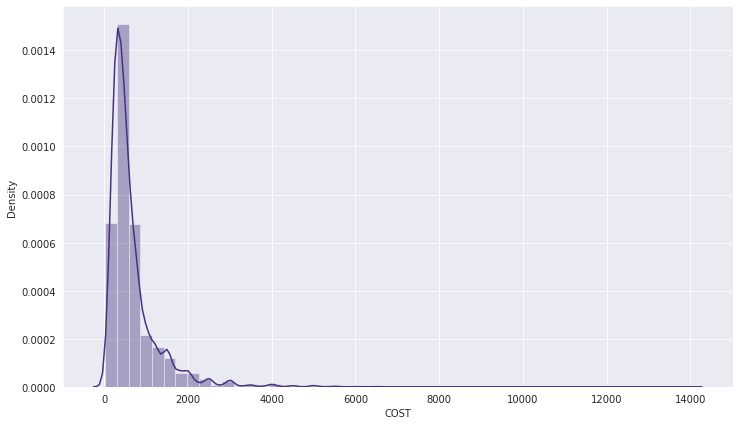

In [65]:
plt.figure().set_size_inches(12,7)
sns.distplot(df['COST'])

In [66]:
print("Mean cost of restaurants =", np.mean(df['COST']))
print("Median cost = ", np.median(df['COST']))

Mean cost of restaurants = 655.2522458628841
Median cost =  500.0


In [67]:
print("Max cost = ", np.max(df['COST']))
print("Min cost = ", np.min(df['COST']))

Max cost =  14000
Min cost =  20


SO the majority of the restaurants cost between 0 and 1000, with mean = Rs. 655 and Median of Rs. 500.

If you want to buy some food, you need Rs. 20, and max you can spend in a restaurant is Rs. 14,000  

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


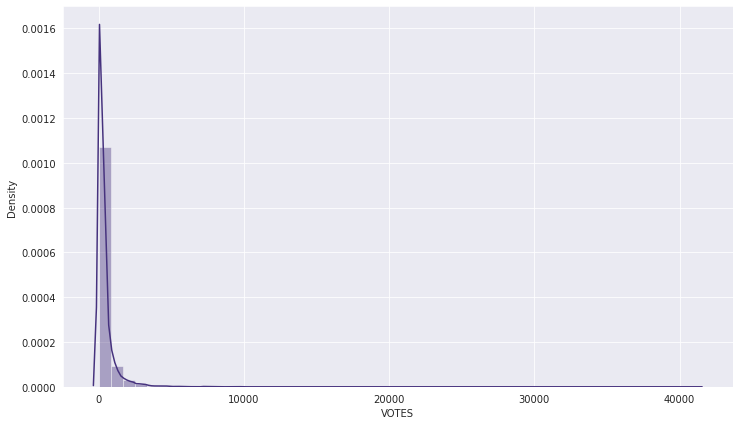

In [68]:
plt.figure().set_size_inches(12,7)
sns.distplot(df['VOTES'])

In [69]:
print("Mean votes =", np.mean(df['VOTES']))
print("Median = ", np.median(df['VOTES']))

Mean votes = 415.6054373522459
Median =  200.0


In [70]:
print("Max Votes = ", np.max(df['VOTES']))
print("Min Votes = ", np.min(df['VOTES']))

Max Votes =  41186.0
Min Votes =  4.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


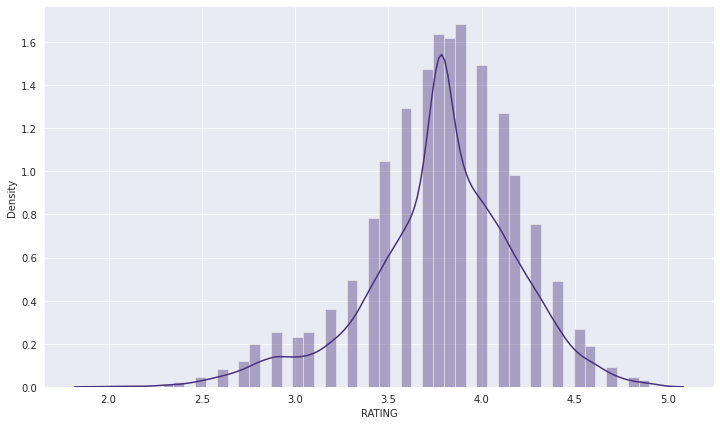

In [71]:
plt.figure().set_size_inches(12,7)
sns.distplot(df['RATING'])

In [72]:
print("Mean rating =", np.mean(df['RATING']))
print("Median = ", np.median(df['RATING']))

Mean rating = 3.7849345941685817
Median =  3.8


In [73]:
print("Max rating = ", np.max(df['RATING']))
print("Min rating = ", np.min(df['RATING']))

Max rating =  4.9
Min rating =  2.0


## Categorical

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          12690 non-null  object 
 1   RESTAURANT_ID  12690 non-null  int64  
 2   CUISINES       12690 non-null  object 
 3   TIME           12690 non-null  object 
 4   CITY           12690 non-null  object 
 5   RATING         12690 non-null  float64
 6   VOTES          12690 non-null  float64
 7   COST           12690 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 793.2+ KB


In [75]:
df.drop("RESTAURANT_ID", axis=1, inplace=True)

### Title

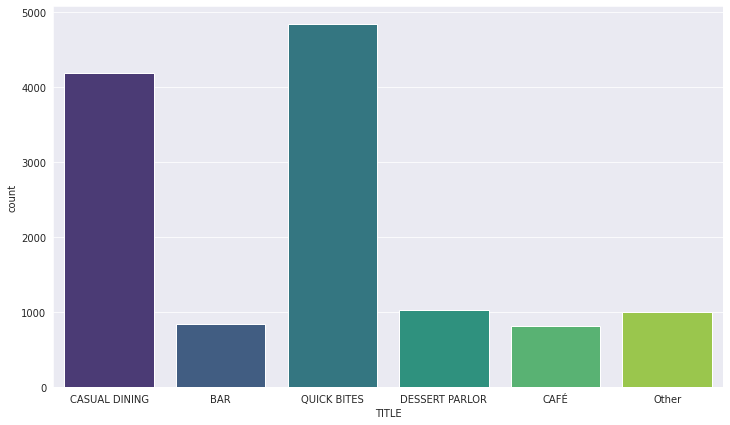

In [76]:
plt.figure().set_size_inches(12,7)
sns.countplot(x = 'TITLE', data = df)

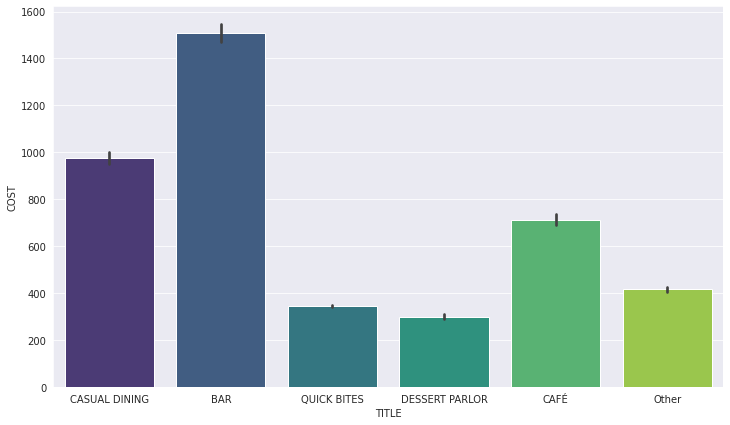

In [77]:
plt.figure().set_size_inches(12,7)
sns.barplot(x = 'TITLE', y = 'COST', data = df)

Bar has higher cost than other places as the alcoholic drinks cost more than normal beverages, and Casual dining also costs more as people tend to take full-course meals.

Quick Bites (Fast Food) and Dessert Parlor are Cheaper.

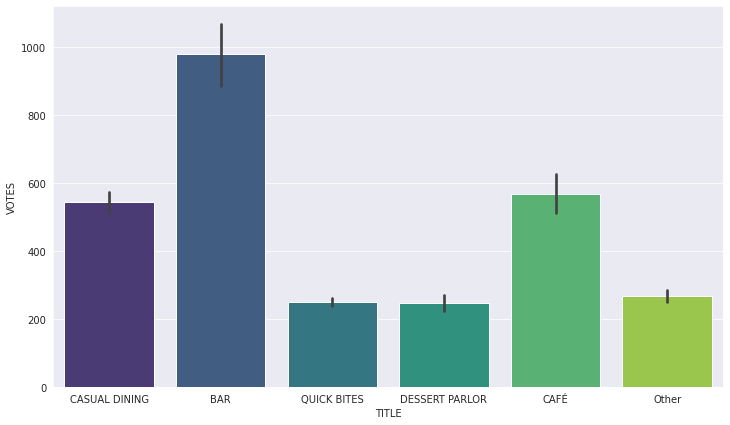

In [78]:
plt.figure().set_size_inches(12,7)
sns.barplot(x = 'TITLE', y = 'VOTES', data = df)

More people review (Vote on) Bars than any other place. Cafes and Casual diner are also reviewed by a fair amount of people

### Cuisines

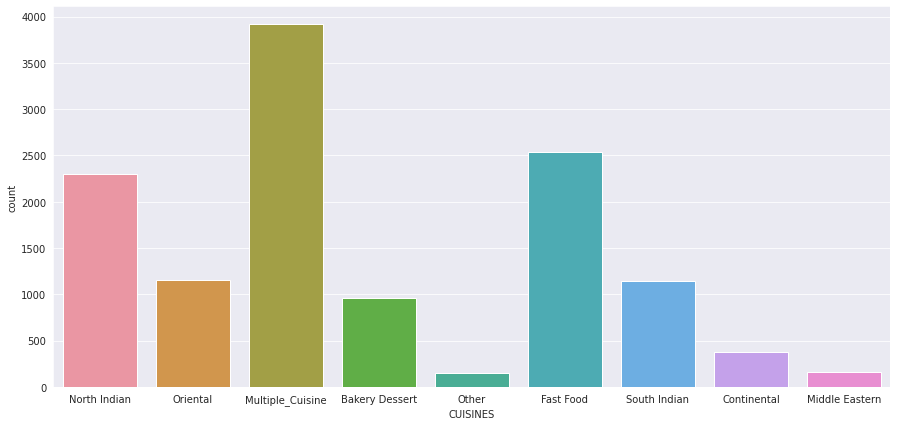

In [79]:
plt.figure().set_size_inches(15,7)
sns.countplot(x = 'CUISINES', data = df)

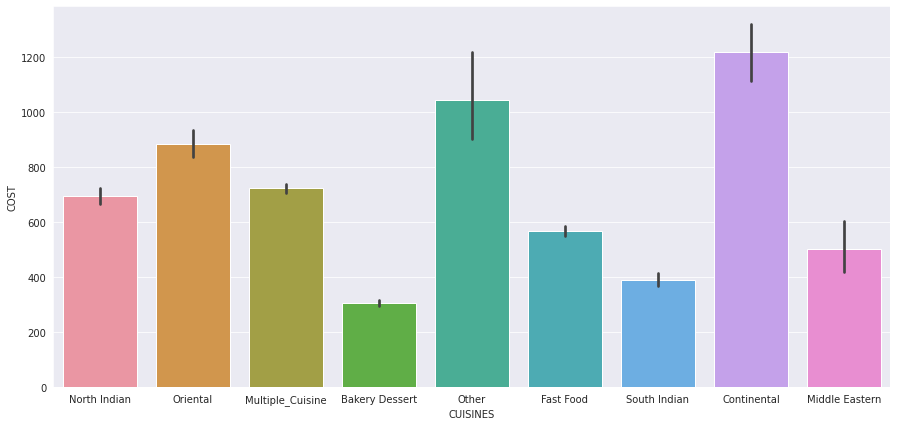

In [80]:
plt.figure().set_size_inches(15,7)
sns.barplot(x = 'CUISINES', y = 'COST', data = df)

Continental Cuisines (European) and Oriental, which are Foreign cuisines, cost more than Indian Cuisines.

Surprisingly, South Indian Food costs lower than Fast Food

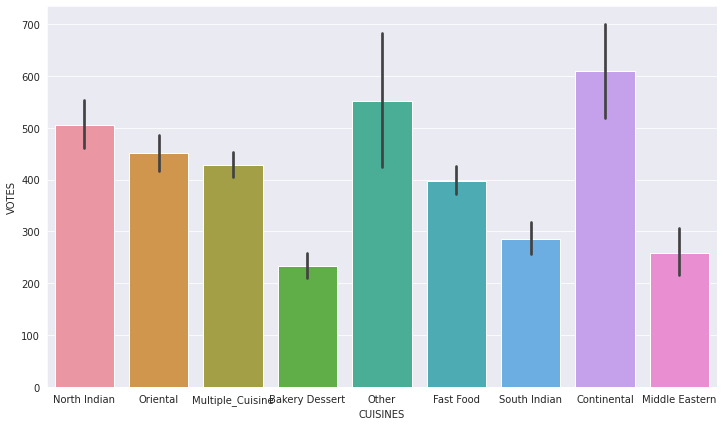

In [81]:
plt.figure().set_size_inches(12,7)
sns.barplot(x = 'CUISINES', y = 'VOTES', data = df)

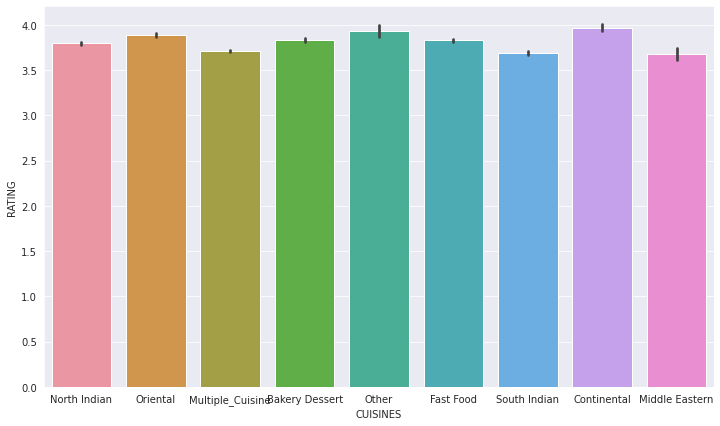

In [82]:
plt.figure().set_size_inches(12,7)
sns.barplot(x = 'CUISINES', y = 'RATING', data = df)

There is no preference of Indians in terms of Cuisines, as all the Cuisines are rated equally

### City

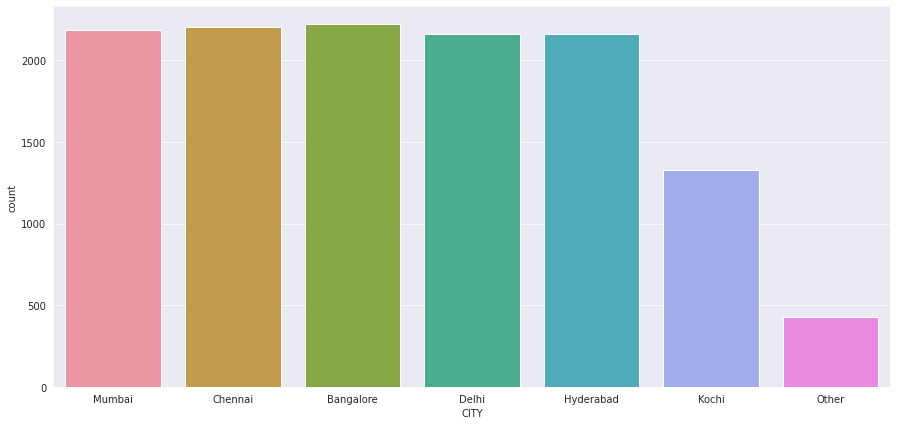

In [83]:
plt.figure().set_size_inches(15,7)
sns.countplot(x = 'CITY', data = df)

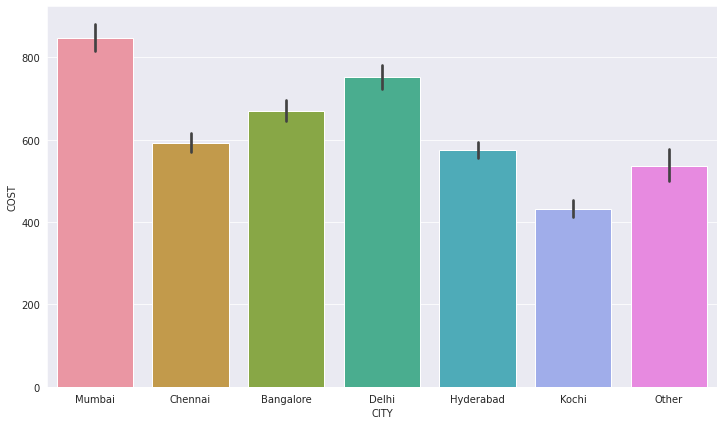

In [84]:
plt.figure().set_size_inches(12,7)
sns.barplot(x = 'CITY', y = 'COST', data = df)

In Mumbai the food is costly, Delhi is second. In Kochi the food is cheaper.

In [85]:
mumbai = df[df["CITY"] == 'Mumbai']

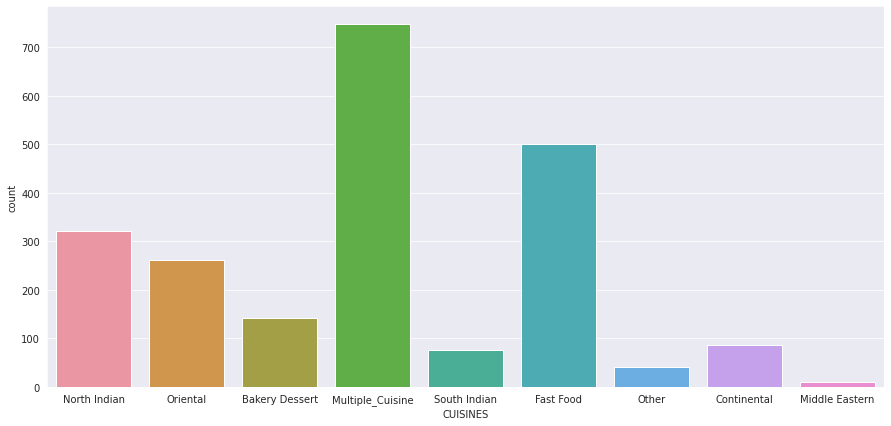

In [86]:
plt.figure().set_size_inches(15,7)
sns.countplot(x = 'CUISINES', data = mumbai)

Most of the restaurants provide Multiple cuisines, and Fast Food seems to be high in number.

Very few restaurants have Middle eastern and continental, as well as exclusively South Indian



In [88]:
chennai = df[df["CITY"] == 'Chennai']

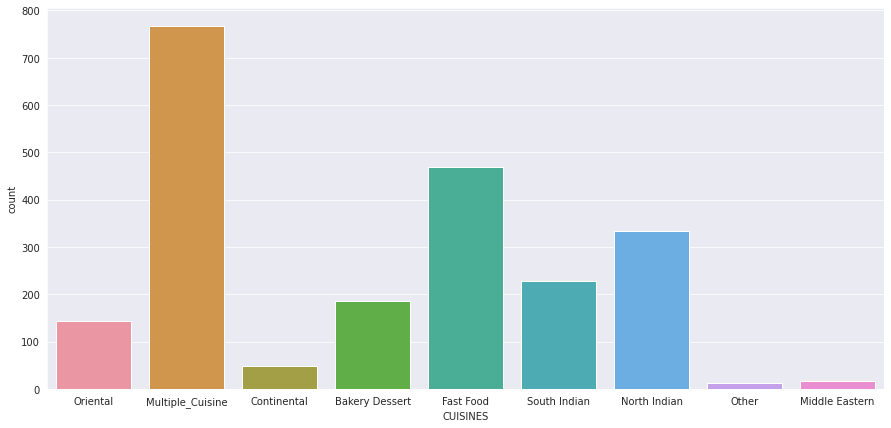

In [89]:
plt.figure().set_size_inches(15,7)
sns.countplot(x = 'CUISINES', data = chennai)

Multiple Cuisines are again high in number, surprisingly, north Indian food restaurants are higher in number than South Indian restaurants

In [90]:
blore = df[df["CITY"] == 'Bangalore']

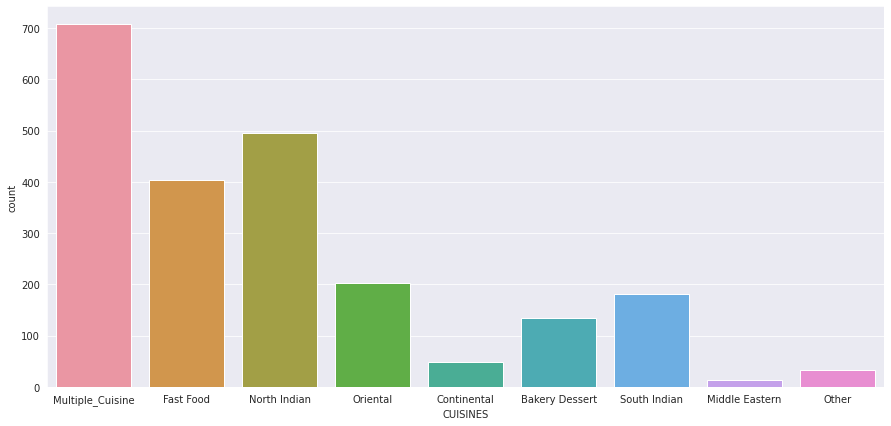

In [91]:
plt.figure().set_size_inches(15,7)
sns.countplot(x = 'CUISINES', data = blore)

Multiple Cuisines, Fast Food and North Indian food are high in number.

In [92]:
delhi = df[df["CITY"] == 'Delhi']

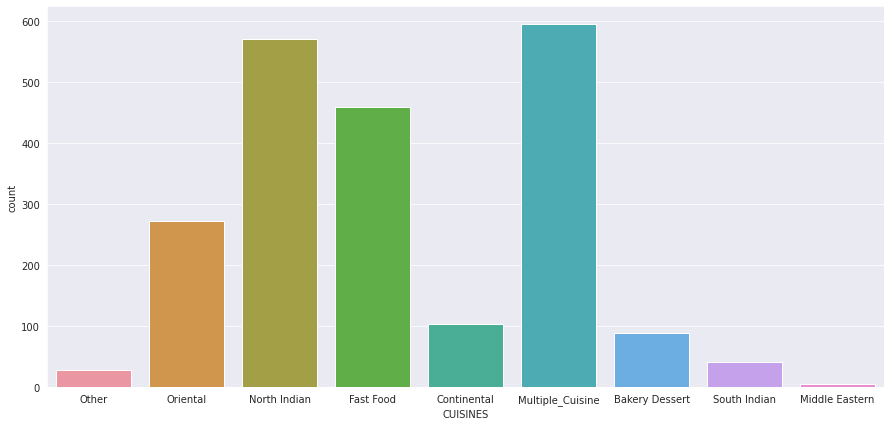

In [93]:
plt.figure().set_size_inches(15,7)
sns.countplot(x = 'CUISINES', data = delhi)

Multiple cuisines and North Indian food, as well as Fast Food restaurants are high in number

In [94]:
hyd = df[df["CITY"] == 'Hyderabad']

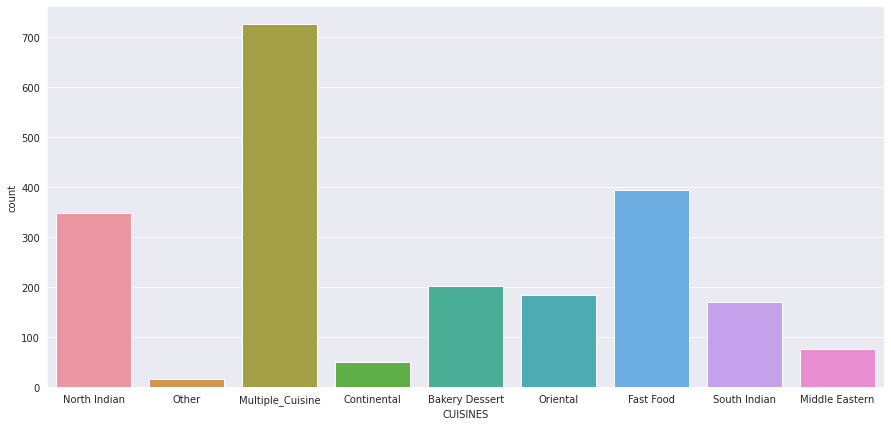

In [95]:
plt.figure().set_size_inches(15,7)
sns.countplot(x = 'CUISINES', data = hyd)

So Multiple cuisine restaurants are high in number.

In [96]:
kochi = df[df["CITY"] == 'Kochi']

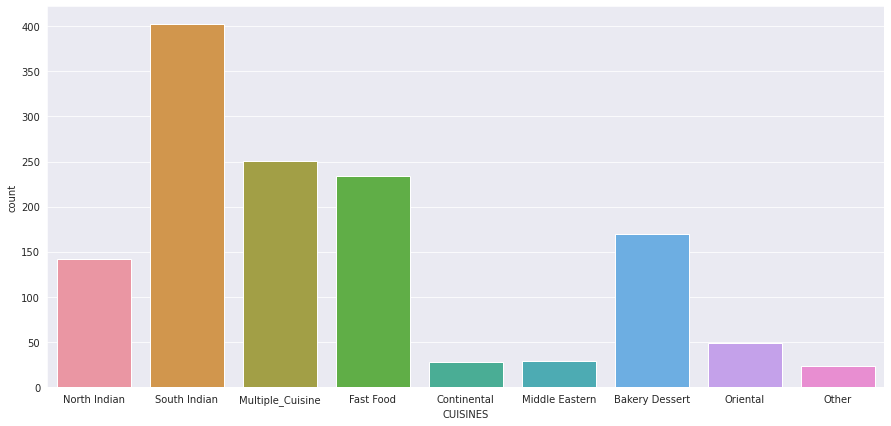

In [97]:
plt.figure().set_size_inches(15,7)
sns.countplot(x = 'CUISINES', data = kochi)

As expected, South Indian restaurants are high in number in Kochi, while people also prefer Fast Food and Bakery

# Data Preprocessing

### Categorical Variable

In [98]:
#One hot encoding:
def encode(column):
  global df
  print(df.shape)
  col = pd.get_dummies(df[column], drop_first = True)
  df = pd.concat([df, col], axis =1)
  df.drop(column, axis = 1, inplace= True)
  print(df.shape)
  

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     12690 non-null  object 
 1   CUISINES  12690 non-null  object 
 2   TIME      12690 non-null  object 
 3   CITY      12690 non-null  object 
 4   RATING    12690 non-null  float64
 5   VOTES     12690 non-null  float64
 6   COST      12690 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 694.1+ KB


In [100]:
encode("TITLE")

(12690, 7)
(12690, 11)


In [101]:
encode("CUISINES")

(12690, 11)
(12690, 18)


In [102]:
encode("TIME")

(12690, 18)
(12690, 21)


In [103]:
encode("CITY")

(12690, 21)
(12690, 26)


### Numeric variable

In [104]:
#Normalization

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4965437ef0>,
      dtype=object)

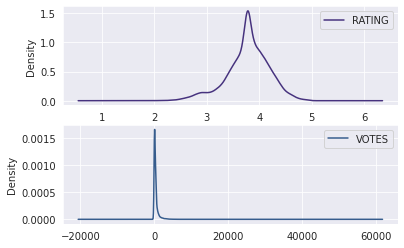

In [105]:
df[['RATING', 'VOTES']].plot(kind = 'kde', subplots = True, sharex = False)

In [106]:
df['VOTES'] = np.log(df['VOTES'])


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f49654aa9e8>,
      dtype=object)

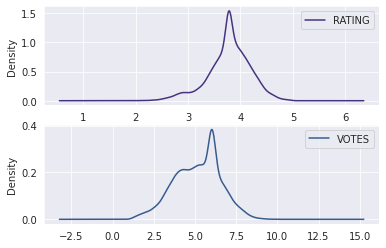

In [107]:
df[['RATING', 'VOTES']].plot(kind = 'kde', subplots = True, sharex = False)

In [108]:
X = df.drop("COST", axis = 1)
y = df['COST']

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 0)

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

In [111]:
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [112]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train_sc, y_train)
y_pred = linreg.predict(X_test_sc)
r2_score(y_test, y_pred)

0.43973673200942354

In [113]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors = 9).fit(X_train_sc,y_train)
y_pred = knr.predict(X_test_sc)
r2_score(y_test, y_pred)

0.4115260777139831

In [114]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_sc,y_train)
y_pred = ridge.predict(X_test_sc)
r2_score(y_test, y_pred)

0.4397349288706207

In [115]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train_sc,y_train)
y_pred = lasso.predict(X_test_sc)
r2_score(y_test, y_pred)

0.4395101184235928

In [116]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor().fit(X_train_sc, y_train)
y_pred = dtr.predict(X_test_sc)
r2_score(y_test, y_pred)

-0.13729290432224772

In [117]:
max_score = 0
for i in range(1, 50, 2):
    knr = KNeighborsRegressor(n_neighbors = i).fit(X_train_sc,y_train)
    y_pred = knr.predict(X_test_sc)
    r2 = r2_score(y_test, y_pred)
    print("R2 = {} for n = {}".format(r2, i))
    if r2>max_score:
        max_score = r2
        neighbors = i
print("Max r2 score = {} for k = {}".format(max_score, neighbors))

R2 = -0.02557147668105708 for n = 1
R2 = 0.31764038104180736 for n = 3
R2 = 0.3821770773006068 for n = 5
R2 = 0.3965361098080663 for n = 7
R2 = 0.4115260777139831 for n = 9
R2 = 0.42471219921463477 for n = 11
R2 = 0.42588569044671265 for n = 13
R2 = 0.42769093835179794 for n = 15
R2 = 0.43425113781265856 for n = 17
R2 = 0.4282003524953504 for n = 19
R2 = 0.4255323945352425 for n = 21
R2 = 0.420564500080684 for n = 23
R2 = 0.42092513342529436 for n = 25
R2 = 0.4187679811192315 for n = 27
R2 = 0.41480590085060165 for n = 29
R2 = 0.4118521057667963 for n = 31
R2 = 0.41248355304315887 for n = 33
R2 = 0.4136795178197653 for n = 35
R2 = 0.4136344453901891 for n = 37
R2 = 0.4119628123871498 for n = 39
R2 = 0.4084775583816326 for n = 41
R2 = 0.40608892152657106 for n = 43
R2 = 0.40612729011244997 for n = 45
R2 = 0.40577998809340854 for n = 47
R2 = 0.4043320900086115 for n = 49
Max r2 score = 0.43425113781265856 for k = 17


In [118]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(), X_train_sc, y_train, scoring='r2', cv=10)

In [119]:
print("Mean value for Linear Regression is ",scores.mean())

Mean value for Linear Regression is  0.4099694284714497


In [120]:
scores = cross_val_score(Ridge(), X_train_sc, y_train, scoring='r2', cv=5)

In [121]:
print("Mean value for Ridge Regression is ",scores.mean())

Mean value for Ridge Regression is  0.4038008892306276


In [122]:
scores = cross_val_score(Lasso(), X_train_sc, y_train, scoring='r2', cv=5)

In [123]:
print("Mean value for Lasso Regression is ",scores.mean())

Mean value for Lasso Regression is  0.40358424841077056


In [124]:
scores = cross_val_score(KNeighborsRegressor(n_neighbors = 17), X_train_sc, y_train, scoring='r2', cv=5)

In [125]:
print("Mean value for k neighbors Regression is ",scores.mean())

Mean value for k neighbors Regression is  0.40252959740286753


Thus, Linear Regression is giving the best results for the given dataset. We will apply One-Hot-encode on categorical data and Normalize the Numerical data.

Then we will apply Standard Scaler to the data, then use Linear regression to predict the estimate price of the restaurant

In [126]:
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [128]:
pipeline = Pipeline([
                     ('Standard Scaler', StandardScaler()),
                     ('Linear Regressor', LinearRegression())
])
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('Standard Scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Linear Regressor',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [129]:

joblib.dump(pipeline, 'Model.joblib')

['Model.joblib']